In [451]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data 
!pip install pandas==0.25

In [452]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [453]:
from sklearn import preprocessing
data = pd.read_csv('/content/train_data.csv')

data.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.65500,0,no,northwest,693,2352.96845
1,28,female,26.51000,2,no,southeast,1297,4340.44090
2,51,male,39.70000,1,no,southwest,634,9391.34600
3,47,male,36.08000,1,yes,southeast,1022,42211.13820
4,46,female,28.90000,2,no,southwest,178,8823.27900


In [454]:
data_op_ori = pd.read_csv('/content/test_data.csv')
data_ori = pd.read_csv('/content/train_data.csv')

In [455]:
data_op = pd.read_csv('/content/test_data.csv')

In [456]:
profile = ProfileReport(df = data)
profile.to_file(outputfile = 'Pre Profiling Report.html')
print('Accomplished!')

Accomplished!


In [457]:
label_encoder = preprocessing.LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data["region"] = label_encoder.fit_transform(data["region"])


label_encoder = preprocessing.LabelEncoder()
data_op["sex"] = label_encoder.fit_transform(data_op["sex"])
data_op["smoker"] = label_encoder.fit_transform(data_op["smoker"])
data_op["region"] = label_encoder.fit_transform(data_op["region"])

In [458]:
data.describe()

,age,sex,bmi,children,smoker,region,id,charges
count,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000,1003.00000
mean,39.25523,0.50449,30.51178,1.10469,0.20538,1.50050,666.87438,13267.93582
std,14.03910,0.50023,6.01311,1.20462,0.40418,1.11546,386.57044,12051.35655
min,18.00000,0.00000,15.96000,0.00000,0.00000,0.00000,0.00000,1121.87390
25%,27.00000,0.00000,26.21000,0.00000,0.00000,0.50000,329.50000,4780.83940
50%,39.00000,1.00000,30.20000,1.00000,0.00000,2.00000,675.00000,9447.38240
75%,51.00000,1.00000,34.43000,2.00000,0.00000,2.00000,1001.50000,16840.66797
max,64.00000,1.00000,53.13000,5.00000,1.00000,3.00000,1337.00000,62592.87309


In [459]:
data.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,1,23.65500,0,0,1,693,2352.96845
1,28,0,26.51000,2,0,2,1297,4340.44090
2,51,1,39.70000,1,0,3,634,9391.34600
3,47,1,36.08000,1,1,2,1022,42211.13820
4,46,0,28.90000,2,0,3,178,8823.27900


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
age         1003 non-null int64
sex         1003 non-null int64
bmi         1003 non-null float64
children    1003 non-null int64
smoker      1003 non-null int64
region      1003 non-null int64
id          1003 non-null int64
charges     1003 non-null float64
dtypes: float64(2), int64(6)
memory usage: 62.8 KB


In [461]:
    cor_matrix = data.corr().abs()
    #print(cor_matrix)
    
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
  
    print(); print(to_drop)


[]


In [462]:
data.drop(data[to_drop], axis=1,inplace = True)
data.drop('id', axis = 1,inplace=True)


data_op.drop(data_op[to_drop], axis=1,inplace = True)
data_op.drop('id', axis = 1,inplace=True)


In [463]:
x=pd.DataFrame(data)
x.drop("charges",axis =1,inplace=True)


In [464]:
x.head()

,age,sex,bmi,children,smoker,region
0,24,1,23.65500,0,0,1
1,28,0,26.51000,2,0,2
2,51,1,39.70000,1,0,3
3,47,1,36.08000,1,1,2
4,46,0,28.90000,2,0,3


In [465]:
y=data["charges"]
y.head()

0    2352.96845
1    4340.44090
2    9391.34600
3   42211.13820
4    8823.27900
Name: charges, dtype: float64

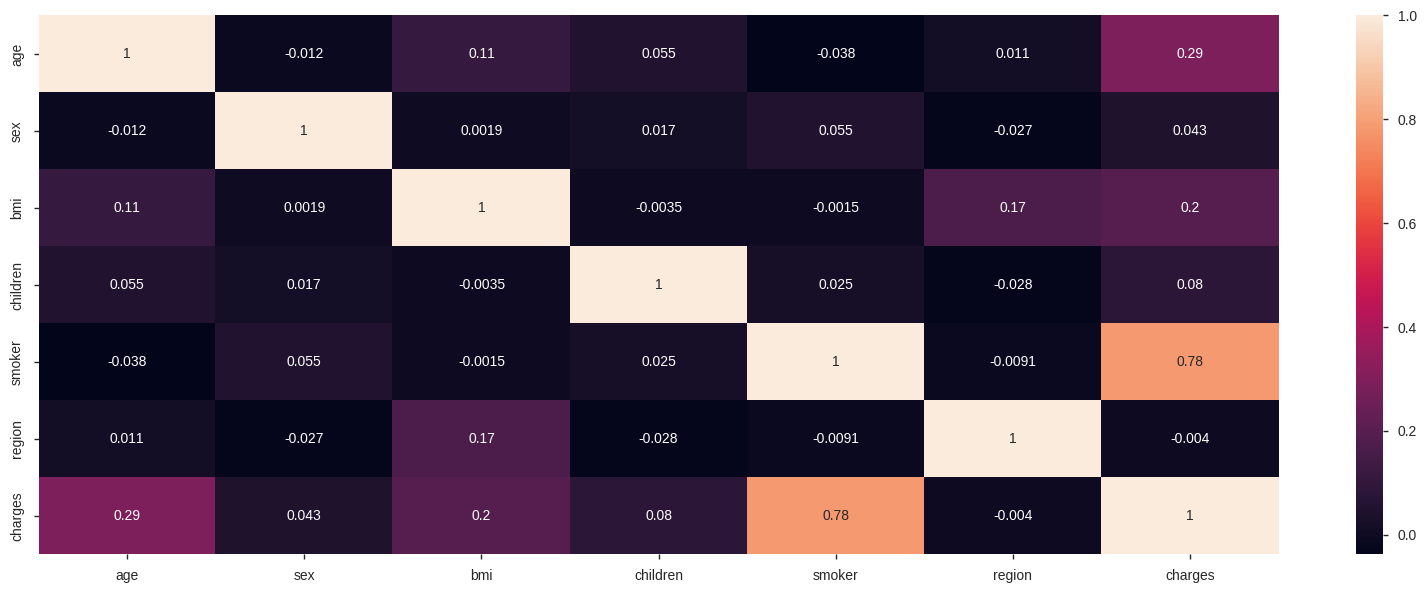

In [466]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

In [467]:
#sns.pairplot(data=data, diag_kind='kde')

#plt.show()

In [468]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.01, random_state = 3)


In [469]:



print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(992, 6)
(992,)
(11, 6)
(11,)


In [470]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = data_op
x_test = sc.transform(x_test)

In [471]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(max_depth = 5)

#param_grid = {'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
 #                'max_depth': list(range(2,500)),
  #              'max_features': ['auto', 'sqrt', 'log2'],
   #             'min_samples_split': list(range(2,500))}

#lr = RandomizedSearchCV(cv, param_grid, cv= 10)


lr.fit(x_train,y_train)




RandomForestRegressor(max_depth=5)

In [472]:
#print(lr.best_score_)
#print(lr.best_params_)
#print(lr.best_estimator_)

In [473]:
y_test_pred_op = lr.predict(x_test)


In [474]:
y_test_pred_op.astype('int32')
y_test_pred_op = pd.DataFrame(y_test_pred_op)

y_test_pred_op.head(2)

,0
0,10950.09378
1,5646.99742


In [475]:

op = pd.DataFrame(data_op_ori["id"])

out = [op,y_test_pred_op]

op = pd.concat(out, axis =1)

op.set_index('id')   

#op[op.columns[1]] = op[op.columns[1]].astype("Int64")

op.columns =['id', 'OP']

op.head(2)


,id,OP
0,764,10950.09378
1,887,5646.99742


In [476]:
print(op.to_csv('/content/submission.csv', index=False, header=False))

None


In [477]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [478]:
x_test.shape

(335, 6)

In [479]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,y_train_pred)
r2_test = metrics.r2_score(y_test,y_test_pred)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

print((r2_train) - (r2_test))

ValueError: ignored

In [ ]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))